<img style="" src="https://upload.wikimedia.org/wikipedia/commons/5/59/PANORAMA_BEOGRADA_SA_PC_%22USCE%22_%28Old_Belgrade_Panorama_From_The_Bilding_%22Usce%22%29.jpg" width="892" height="230">

# Where to open new buiness in Belgrade?
## Data Science show-case project: investigating Belgrade neighborhoods and venues
The Battle of Neighborhoods Capsone Project<br>
by Goran D. Stevanovic<br>
11-May-2020

# Table of content
1. <a href="#item1">Introduction</a>
2. <a href="#item2">Data Requirements, Collection and Understanding</a>
3. <a href="#item3">Data Preparation</a>
4. <a href="#item4">Modeling - Clustering and Exploring</a>
5. <a href="#item5">Results - Response to the Business Problem</a>
6. <a href="#item6">Discussion</a>
7. <a href="#item7">Conslusion</a>
8. <a href="#item8">References</a>

<a id="item1"> </a>
# 1. Introduction

## 1.2. Business Understanding
Belgrade is 1.6 million city, capital of Serbia, with multiple urban municipalities (boroughs) and suburban municipalities. Each urban borough has multiple neighborhoods.<br>
In recent years Belgrade is developing very rapidly, where some new neighborhoods are emerging and gaining popularity, while some traditional neighborhoods are being re-shaped. This obviously creates potential gaps, but also an opportunity. Inadequate accessibility of certain venues in specific neighborhoods is potential opportunity for investors to consider opening new, or extending existing business into those neighborhoods.

This Data Science show-case project will inspect current status of Belgrade neighborhoods and venues, and make recommendation for potential investors.

<b>Business Goal</b> is to define in which neighborhoods there is a potential for opening new business, i.e. new venue.
For this purposes, combination of statistical data (i.e. average income, real-estate values) and geolocation and venue data (i.e. Foursquare data) will be used to develop the analysis of the most promising locations for opening new business.<br>

<b>Business Objective</b> of the business owner, opening new, or extending existing network of the business, is to locate the most suitable location for opening its business venue. Equipped with the info about potential neighborhoods of interests, stakeholders will be able to plan the expansion of their business in Belgrade.<br>

The focus is businesses/venues primarily relevant to neighborhood residents i.e. gyms, fitness, kids playgrounds, pharmacies, beauty salons, grocery stores etc. However, for evaluating potential for other venue categories, like shop, shopping malls, restaurants, café bars etc. other input data would need to be used for analysis – instead of leaving desirability other aspects of business desirability, accessibility and commuting traffic should be considered, which is not in scope of this particular analysis.<br>
Please note, this analysis is Showcase Data Science Project, built with Open Source tools, and built only on feely available data. Communalization of this (or similar) project, should include more accurate and up-to-date data sources, which could imply certain costs.

## 1.2. Analytical Approach
To address Business Problem, classification model will be used. <br>
Neighborhoods will be classified and outcome of those classifications will be discussed.
- Publicly available statistical data about employees’ gross income and real-estate average price will be to determine current living desirability of each neighborhoods, classifying neighborhoods accordingly. 
- Beside the statistical data, this classification will also be supported with Foursquare data, listing most common venue categories available in each neighborhoods. Evaluation will be used with options to use only statistical data, to use only venue categories data, or to both statistical and venue categories data in each neighborhood. Outcome and precision of each approach will be discussed.
- After delivering the satisfactory classification, Foursquare data will be used to count the specific venue groups for each neighborhood – enabling an identification of neighborhoods, within the same classification, with bellow average access to specific venue categories 
- If residents of the neighborhood have below average access to specific venues categories, this is a potential opportunity to start such business in that neighborhood.

### 1.2.1. Constraints
This assignment is created as part of the Capstone Project – The Battle of Neighborhoods, and as such it must:
1.	Leverage the Foursquare location data,
2.	Explore or compare neighborhoods or cities or come up with a problem that can use the Foursquare location data to solve

<a id="item2"> </a>
# 2. Data Requirements, Collection and Understanding

## 2.1. Data Requirements
The current living desirability will be primarily determined based on financial and market data.
1.	Belgrade employees’ average gross income per municipalities, in RSD. This information is publicly available either from the State Statistical Office (https://www.stat.gov.rs/sr-Latn/oblasti/trziste-rada/zarade) or from the official City of Belgrade publication web portal (https://zis.beograd.gov.rs/index.php/2013-12-03-10-50-11/2013-11-04-10-15-34/finish/4-z-p-sl-n-s-i-z-r-d/113-pr-s-cn-z-r-d-p-z-p-sl-n-s-p-b-r-2019.html). The State Statistical office makes regular vast number of publications and/or provide statistical data on demand, but neither there is public (free) available API, nor is this information available on web pages for html stripping. The City of Belgrade provide necessary employees’ average gross income per Belgrade municipalities. This data be used. However this data is publicly available only in PDF format, there is public (free) available API, so data will be manually parsed into CSV table.
2.	Belgrade real-estate average price per municipalities and respective neighborhoods, in EUR per square meter. This information is publicly available on several web portals. The most comprehensive list is available on Imovina.net (https://imovina.net/statistiika_cena_nekretnina/?viewType=table&category=1&city=1&year=2020&stats=699&load=PRIPREMI). This data will be used. However data is provided as query result in JavaScript, no html tripping of data is possible, there is no public (free) available API to use, so data will be manually parsed into CSV table. </br>

Data about venues categories is collected from Foursquare.
3.	In order to utilize Foursquare, geolocation (Latitude and Longitude) for Belgrade neighborhoods are extracted using google. Note: considering there is no unified list of Belgrade neighborhoods, instead of using geopy library, geolocation (Latitude and Longitude) is extracted manually from google and prepared in CSV table. This is one time activity which can be re-used for all future analysis.
4.	Foursquare application API is used to gather venues and venues categories which will be used both in the classification, and discussion of the outcomes to count the specific venue groups for each neighborhood – enabling an identification of neighborhoods, within the same classification, with bellow average access to specific venue categories 
It should be noted, there is no official list of all neighborhoods. Various real-estate web portals provides different lists, which included additional neighborhoods, other than those traditional neighborhoods. 

## 2.2. Data Collection
Data is collected from the following Data Sources
- Belgrade employees’ average gross income per municipalities is provided as CSV table on the level of municipalities.
- Belgrade real-estate average price is available per municipalities and their neighborhoods is provided as CSV table on the level of neighborhoods. 
- Geolocation (Latitude and Longitude) is provided on the level of traditional neighborhoods.
- Foursquare venue data is collected for each geolocation of neighborhoods 

Additional, data sources to be considered.
- For determining the living desirability of the particular neighborhood. The State Tax Administration data can be used as complementary data. Taxation is based on several criteria, including calculation of real-estate average price, as well as city zone predefined by city regulations. At the initial stage of this exercise, this data will not be used, as data is not refreshed frequently and cannot caught market trends. 

## 2.3. Data Understanding
All collected data will be prepared and cleaned:
- Combined neighborhoods DataFrame with employees’ average gross income, real-estate average price and geolocation will be created from the three data sources:
 - Employees’ average gross income is available only per municipalities, municipal average will be applied for all neighborhoods within the municipality.
 - Suburban municipalities may not have associated neighborhoods
   - If in the combined neighborhoods DataFrame row, municipality does not have neighborhood, then neighborhood = municipality.
 - Geolocation is available only for traditional neighborhoods (and/or larger landmarks). Data for neighborhoods from real-estate data source is matched and paired with geolocation of neighborhoods. Rows with micro-locations (neighborhoods from real-estate data source) which do not have geolocations, are omitted.
   - If in the combined neighborhoods DataFrame row, there is no geolocation, then row is removed.
 -	Foursquare venue data is matched with the combined neighborhoods DataFrame.
- Venue categories are “cleaned” and simplified:
 - All venue categories with expression like “restaurant” are combined into single venue category “restaurant”. Similar approach is used for “coffie” and “café”, “gym” and “fitness” etc.
  - Venue categories are used to calculate most common venue categories for each neighborhood. This data will be used to support the classification of the neighborhoods.
  - Venues categories count for each neighborhood will be used for the discussion 


<a id="item3"> </a>
# 3. Data Preparation 

## 3.1. Import libraries
Installation and/or importing of the key libreries whihc will be used in the analysis. 

In [1]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import types
import numpy as np # library to handle data in a vectorized manner

#!conda install -c conda-forge geopy --yes
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#!conda install -c conda-forge folium=0.5.0 --yes
!pip install folium
import folium # map rendering library

import requests # library to handle requests
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline 

# import K-Means for clustering
from sklearn.cluster import KMeans

print('Libraries imported.')

     |████████████████████████████████| 102kB 6.1MB/s ta 0:00:011
Libraries imported.


CSV (Excel due to UTF-8 encoding) data files are stored in the IBM project cloud storage (as a data sample). 
Function for loading data from the storage is defined.

In [2]:
# The code was removed by Watson Studio for sharing.

## 3.2. Importing data

Importing Belgrade employees’ average gross income per municipalities into DataFrame, in RSD (sample data provided for February 2020).

In [3]:
body = client_bb1acf073e6e4dee8f19e3a49f3aa736.get_object(Bucket='courseracapstone-donotdelete-pr-frjvyhnjtconjw',Key='Beograd_Income.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
Beograd_Income = pd.read_excel(body)
print(Beograd_Income.shape)
Beograd_Income.head()

(16, 2)


,Municipality,Employees avg income
0,Barajevo,70603
1,Vožovac,103300
2,Vračar,131100
3,Grocka,71142
4,Zvezdara,102383


Importing Belgrade real-estate average price per municipalities and respective neighborhoods, in EUR per square meter (sample data provided for February 2020). 

Neighborhood type is also implying its relative size.

In [4]:
body = client_bb1acf073e6e4dee8f19e3a49f3aa736.get_object(Bucket='courseracapstone-donotdelete-pr-frjvyhnjtconjw',Key='Beograd_Res.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
Beograd_Res = pd.read_excel(body)
print(Beograd_Res.shape)
Beograd_Res.head()

(77, 4)


,Municipality,Neighborhood,Neighborhood type,Real-estate avg price
0,Savski venac,Belgrade Waterfront,Urban,3569
1,Savski venac,Zeleni venac,Urban,2357
2,Savski venac,Savski Trg,Urban microlocation,2188
3,Savski venac,Ekonomski Fakultet,Urban microlocation,2100
4,Savski venac,Palata pravde,Urban microlocation,2043


Geolocation (Latitude and Longitude) for Belgrade neighborhoods are extracted using geopy library.

Note: considering there is no unified list of Belgrade neighborhoods, instead of using geopy library, geolocation (Latitude and Longitude) is extracted manually from google and prepared in CSV table. 
This is one time activity which can be re-used for all future analysis.

In [5]:
"""
Beograd_Geo = Beograd_Res
Beograd_Geo['Latitude'] = 0
Beograd_Geo['Longitude'] = 0

for index, row in Beograd_Geo.iterrows():
    address = row['Neighborhood'] + ', ' + row['Municipality'] + ', Serbia'
    geolocator = Nominatim(user_agent="beograd_explorer")
    location = geolocator.geocode(address)
    Beograd_Geo.at[index, 'Latitude'] = location.latitude
    Beograd_Geo.at[index, 'Longitude'] = location.longitude
"""
body = client_bb1acf073e6e4dee8f19e3a49f3aa736.get_object(Bucket='courseracapstone-donotdelete-pr-frjvyhnjtconjw',Key='Beograd_Geo.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
Beograd_Geo = pd.read_excel(body)
print(Beograd_Geo.shape)
Beograd_Geo.head()

(59, 3)


,Neighborhood,Latitude,Longitude
0,A blok,44.806583,20.401885
1,Andrićev venac,44.810467,20.462996
2,Arena,44.814569,20.421348
3,Belgrade Waterfront,44.804835,20.448303
4,Belvil,44.805555,20.407605


### 3.2.3. DataFrame Wrangling

Combined neighborhoods DataFrame with employees’ average gross income, real-estate average price and geolocation will be created from the three data sources:
-	Employees’ average gross income is available only per municipalities, municipal average will be applied for all neighborhoods within the municipality.
-	Suburban municipalities may not have associated neighborhoods
 -	If in the combined neighborhoods DataFrame row, municipality does not have neighborhood, then neighborhood = municipality.
-	Geolocation is available only for traditional neighborhoods (and/or larger landmarks). Data for neighborhoods from real-estate data source is matched and paired with geolocation of neighborhoods. Rows with micro-locations (neighborhoods from real-estate data source) which do not have geolocations, are omitted.
 -	If in the combined neighborhoods DataFrame row, there is no geolocation, then row is removed.

In [6]:
# First let's join income and real-estate DataFrmes
beo1 = Beograd_Res
beo1 = beo1.join(Beograd_Income.set_index('Municipality'), on='Municipality')

# Then replace enpty Neighborhood names with Municipality names
for index, row in beo1.iterrows():
    if row['Neighborhood'] == '':
        beo1.at[index, 'Neighborhood'] = row['Municipality']
            
# It should be noted, that real-estate prices are in EUR and income is in RSD. let's convert RSD into EUR, using standard median exchange rate. 
exchange_rate = 117.5787
beo1['Employees avg income'] = beo1['Employees avg income'] / exchange_rate

print(beo1.shape)
beo1.head()

(77, 5)


,Municipality,Neighborhood,Neighborhood type,Real-estate avg price,Employees avg income
0,Savski venac,Belgrade Waterfront,Urban,3569,988.384801
1,Savski venac,Zeleni venac,Urban,2357,988.384801
2,Savski venac,Savski Trg,Urban microlocation,2188,988.384801
3,Savski venac,Ekonomski Fakultet,Urban microlocation,2100,988.384801
4,Savski venac,Palata pravde,Urban microlocation,2043,988.384801


Let's combine data with geolocations.

Data is sorted by Municipality and Neighborhood.

In [7]:
# Now let's join combined income and real-estate DataFrme with geolocation DataFrame
beo2 = beo1.copy()
beo2 = beo2.join(Beograd_Geo.set_index('Neighborhood'), on='Neighborhood')
beo2.dropna(inplace=True)
beo2.sort_values(by=['Municipality', 'Neighborhood'], inplace=True)
beo2.reset_index(drop=True, inplace=True)
print(beo2.shape)
beo2.head()

(59, 7)


,Municipality,Neighborhood,Neighborhood type,Real-estate avg price,Employees avg income,Latitude,Longitude
0,Novi Beograd,A blok,Urban microlocation,2728,1069.020154,44.806583,20.401885
1,Novi Beograd,Arena,Urban,2006,1069.020154,44.814569,20.421348
2,Novi Beograd,Belvil,Urban microlocation,2728,1069.020154,44.805555,20.407605
3,Novi Beograd,Bežanijski blokovi,Urban,1480,1069.020154,44.806209,20.382241
4,Novi Beograd,Bežaniska kosa,Urban,1586,1069.020154,44.817644,20.375562


Let's set Range based on the Neighborhood type.
- Urban is default neighborhood size
- Urban microlocation is a small urban neighborhood
- Suburban is larger neighborhood in the outskirts of the city zone
- Suburb is separate settlement or town outside of the main city zone, but within metropolitan city area

In [8]:
beo2['Radius'] = 500 # default value is for 'Urban'

for index, row in beo2.iterrows():
    if row['Neighborhood type'] == 'Urban microlocation':
        beo2.at[index, 'Radius'] = 200
    elif row['Neighborhood type'] == 'Suburban':
        beo2.at[index, 'Radius'] = 1000
    elif row['Neighborhood type'] == 'Suburb':
        beo2.at[index, 'Radius'] = 1500

print(beo2.shape)
beo2.head()

(59, 8)


,Municipality,Neighborhood,Neighborhood type,Real-estate avg price,Employees avg income,Latitude,Longitude,Radius
0,Novi Beograd,A blok,Urban microlocation,2728,1069.020154,44.806583,20.401885,200
1,Novi Beograd,Arena,Urban,2006,1069.020154,44.814569,20.421348,500
2,Novi Beograd,Belvil,Urban microlocation,2728,1069.020154,44.805555,20.407605,200
3,Novi Beograd,Bežanijski blokovi,Urban,1480,1069.020154,44.806209,20.382241,500
4,Novi Beograd,Bežaniska kosa,Urban,1586,1069.020154,44.817644,20.375562,500


### 3.2.2. Getting Foursquare venues data

Use geopy library to get the latitude and longitude values of Belgrade.

In [9]:
address = 'Belgrade, Serbia'
geolocator = Nominatim(user_agent="beograd_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geolocation of Belgrade is {}, {}.'.format(latitude, longitude))

The geolocation of Belgrade is 44.8178131, 20.4568974.


Map of Belgrade with neighborhoods superimposed on top.

In [10]:
# create map
Beograd_Map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, municipl, neigh in zip(beo2['Latitude'], beo2['Longitude'], beo2['Municipality'], beo2['Neighborhood']):
    label = '{}, {}'.format(neigh, municipl)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Beograd_Map)  
    
Beograd_Map

Foursquare Credentials and Version.

In [11]:
# The code was removed by Watson Studio for sharing.

Function to get details about nearby venues.

In [12]:
def getNearbyVenues(neighborhood, latitude, longitude, radius, LIMIT):
    venues_list=[]
    for neigh, lat, lng, rad in zip(neighborhood, latitude, longitude, radius):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            rad, 
            LIMIT)
            
        try:
            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']
        
            # return only relevant information for each nearby venue
            venues_list.append([(
                neigh, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
        except:
            continue
            
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Run function to get details about venues for Belgrade.

In [13]:
# create new dataframe by getting nerby venues
# beo3 = getNearbyVenues(neighborhood=beo2['Neighborhood'], lat=beo2['Latitude'], lng=beo2['Longitude'], radius=beo2['Radius'], lmt=100)

beo3 = getNearbyVenues(beo2['Neighborhood'], beo2['Latitude'], beo2['Longitude'], beo2['Radius'], 100)

print(beo3.shape)
beo3.head()

(2053, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,A blok,44.806583,20.401885,Coffeedream,44.806017,20.401392,Coffee Shop
1,A blok,44.806583,20.401885,Bemata,44.806593,20.400834,Gluten-free Restaurant
2,A blok,44.806583,20.401885,Cafeteria Italiana,44.805964,20.400704,Coffee Shop
3,A blok,44.806583,20.401885,Кафетерија | Kafeterija,44.805984,20.401449,Coffee Shop
4,A blok,44.806583,20.401885,Le Petit Bistro,44.805710,20.400232,Bistro


Let's inspect how many venues were returned for each venue category.

In [14]:
# beo3.groupby(['Venue Category']).count()[['Venue']]

Let's find out how many unique categories can be curated from all the returned venues.

In [15]:
print('There are {} uniques categories.'.format(len(beo3['Venue Category'].unique())))

There are 212 uniques categories.


Let's inspect venues per venue category (used for evaluate which categories can be merged/consolidated).

In [16]:
# beo3[beo3['Venue Category'].str.contains('^.*Joint$', case=False, regex=True)==True]

Based on the previous inspection of the data, let's merge/consolidate similar categories:

- Restaurants
- Pubs and Bars
- Coffee Shops
- Gym, Fittnes, Yoga and Pilates
- Movie Theater and Multiplex
- Kids Indoor Play Areas
- etc.

*) More (or less) merging and consolidation can be applied, depending of the scope of the analysis.

In [17]:
# copy to the new DataFrame
beo4 = beo3.copy()

# merge/consolidate categories
beo4['Venue Category'].replace(regex=['^.*Restaurant.*$'], value = 'Restaurant', inplace=True)
beo4['Venue Category'].replace(regex=['^.*Market$'], value = 'Market', inplace=True)
beo4['Venue Category'].replace(regex=['^.*Pub$', '^.*Bar$', '^.*Brewery.*$', 'Beer Garden', 'Gastropub'], value = 'Pub and Bar', inplace=True)
beo4['Venue Category'].replace(regex=['^.*Café.*$', '^.*Cafeteria.*$'], value = 'Coffee Shop', inplace=True)
beo4['Venue Category'].replace(regex=['^.*Gym.*$', '^.*Fitness.*$', '^.*Pilates.*$','^.*Yoga.*$', 'Recreation Center'], value = 'Gym and Recreation', inplace=True)
beo4['Venue Category'].replace(to_replace=['Movie Theater', 'Multiplex'], value = 'Movie Theater and Multiplex', inplace=True)
beo4['Venue Category'].replace(to_replace=['BBQ Joint', 'Burger Joint'], value = 'BBQ and Burger', inplace=True)
beo4['Venue Category'].replace(to_replace=['Grocery Store', 'Supermarket'], value = 'Grocery and Supermarket', inplace=True)
beo4['Venue Category'].loc[
    beo4['Venue'].str.contains('^.*Igraonica.*$', case=False, regex=True)==True] = 'Indoor Play Area'

# since there is a venue category, rename it
beo4['Venue Category'].replace(to_replace ='Neighborhood', value = 'Neighborhood Site', inplace=True)

print('Now, after consolidation, there are {} uniques categories.'.format(len(beo4['Venue Category'].unique())))

Now, after consolidation, there are 162 uniques categories.


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Let's verify venues per venue category.

In [18]:
#beo4.groupby(['Venue Category']).count()[['Venue']]

<a id="item4"> </a>
# 4. Modeling - Clustering and Exploring

First, let's do One Hot Encoding for each category/

In [19]:
# one hot encoding
beo5_onehot = pd.get_dummies(beo4['Venue Category'], prefix="", prefix_sep="")

# create dataframe with neighborhood column, and columns for each venue category
beo5_onehot = pd.concat([beo4['Neighborhood'], beo5_onehot], axis=1)
print(beo5_onehot.shape)
beo5_onehot.head()

(2053, 163)


,Neighborhood,Arcade,Art Gallery,Arts & Crafts Store,Athletics & Sports,Auto Garage,Auto Workshop,BBQ and Burger,Baby Store,Bakery,Bank,Basketball Stadium,Bed & Breakfast,Beer Store,Betting Shop,Bistro,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Buffet,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Camera Store,Candy Store,Carpet Store,Casino,Chocolate Shop,Church,Clothing Store,Coffee Shop,College Quad,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cultural Center,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Dog Run,Donut Shop,Drugstore,Electronics Store,Erotic Museum,Event Space,Eye Doctor,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Forest,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Gas Station,General Entertainment,Gift Shop,Gourmet Shop,Grocery and Supermarket,Gun Range,Gym and Recreation,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hostel,Hotel,IT Services,Ice Cream Shop,Indoor Play Area,Insurance Office,Jazz Club,Jewelry Store,Kids Store,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Men's Store,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater and Multiplex,Moving Target,Museum,Music Store,Nail Salon,Neighborhood Site,Nightclub,Noodle House,Organic Grocery,Other Nightlife,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pedestrian Plaza,Perfume Shop,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pizza Place,Playground,Plaza,Pool,Pool Hall,Print Shop,Pub and Bar,Record Shop,Rest Area,Restaurant,Road,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sausage Shop,Sculpture Garden,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Spa,Sporting Goods Shop,Steakhouse,Tea Room,Tennis Court,Theater,Theme Park,Thrift / Vintage Store,Track,Trail,Tram Station,Video Store,Water Park,Women's Store,Zoo
0,A blok,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,A blok,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,A blok,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,A blok,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,A blok,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category.

In [20]:
beo6 = beo5_onehot.groupby('Neighborhood').mean().reset_index()
print(beo6.shape)
beo6.head()

(59, 163)


,Neighborhood,Arcade,Art Gallery,Arts & Crafts Store,Athletics & Sports,Auto Garage,Auto Workshop,BBQ and Burger,Baby Store,Bakery,Bank,Basketball Stadium,Bed & Breakfast,Beer Store,Betting Shop,Bistro,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Buffet,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Camera Store,Candy Store,Carpet Store,Casino,Chocolate Shop,Church,Clothing Store,Coffee Shop,College Quad,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cultural Center,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Dog Run,Donut Shop,Drugstore,Electronics Store,Erotic Museum,Event Space,Eye Doctor,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Forest,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Gas Station,General Entertainment,Gift Shop,Gourmet Shop,Grocery and Supermarket,Gun Range,Gym and Recreation,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hostel,Hotel,IT Services,Ice Cream Shop,Indoor Play Area,Insurance Office,Jazz Club,Jewelry Store,Kids Store,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Men's Store,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater and Multiplex,Moving Target,Museum,Music Store,Nail Salon,Neighborhood Site,Nightclub,Noodle House,Organic Grocery,Other Nightlife,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pedestrian Plaza,Perfume Shop,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pizza Place,Playground,Plaza,Pool,Pool Hall,Print Shop,Pub and Bar,Record Shop,Rest Area,Restaurant,Road,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sausage Shop,Sculpture Garden,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Spa,Sporting Goods Shop,Steakhouse,Tea Room,Tennis Court,Theater,Theme Park,Thrift / Vintage Store,Track,Trail,Tram Station,Video Store,Water Park,Women's Store,Zoo
0,A blok,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.25,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.250000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Andrićev venac,0.012658,0.025316,0.0,0.0,0.0,0.0,0.000000,0.0,0.012658,0.0,0.000000,0.0,0.000000,0.0,0.00,0.012658,0.012658,0.0,0.012658,0.0,0.012658,0.012658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012658,0.012658,0.126582,0.0,0.000000,0.0,0.0,0.0,0.025316,0.012658,0.012658,0.012658,0.0,0.025316,0.000000,0.012658,0.0,0.0,0.012658,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.012658,0.0,0.025316,0.000000,0.012658,0.012658,0.0,0.012658,0.0,0.0,0.075949,0.075949,0.0,0.025316,0.0,0.0,0.025316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.025316,0.0,0.025316,0.0,0.0,0.000000,0.025316,0.0,0.0,0.000000,0.0,0.0,0.0,0.025316,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.012658,0.0,0.025316,0.0,0.0,0.0,0.063291,0.0,0.0,0.101266,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.012658,0.000000,0.000000,0.012658,0.0,0.0,0.012

Let's create normalized DataFrame with both statistical data and venue categories. 

- This DataFrame will be core data source for the clustering.

In [21]:
# create a new DataFrame for classification
beo7 = beo2[['Municipality', 'Neighborhood', 'Real-estate avg price', 'Employees avg income']].copy()

# normalize statistical data (min-max) 
beo7['Real-estate avg price']=(
    beo7['Real-estate avg price']-beo7['Real-estate avg price'].min())/(
    beo7['Real-estate avg price'].max()-beo7['Real-estate avg price'].min())
beo7['Employees avg income']=(
    beo7['Employees avg income']-beo7['Employees avg income'].min())/(
    beo7['Employees avg income'].max()-beo7['Employees avg income'].min())

# join with venue category mean data.
beo7 = beo7.join(beo6.set_index('Neighborhood'), on='Neighborhood')
beo7.dropna(inplace=True)
beo7.sort_values(by=['Municipality', 'Neighborhood'], inplace=True)
beo7.reset_index(drop=True, inplace=True)
print(beo7.shape)
beo7.head()

(59, 166)


,Municipality,Neighborhood,Real-estate avg price,Employees avg income,Arcade,Art Gallery,Arts & Crafts Store,Athletics & Sports,Auto Garage,Auto Workshop,BBQ and Burger,Baby Store,Bakery,Bank,Basketball Stadium,Bed & Breakfast,Beer Store,Betting Shop,Bistro,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Buffet,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Camera Store,Candy Store,Carpet Store,Casino,Chocolate Shop,Church,Clothing Store,Coffee Shop,College Quad,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cultural Center,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Dog Run,Donut Shop,Drugstore,Electronics Store,Erotic Museum,Event Space,Eye Doctor,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Forest,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Gas Station,General Entertainment,Gift Shop,Gourmet Shop,Grocery and Supermarket,Gun Range,Gym and Recreation,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hostel,Hotel,IT Services,Ice Cream Shop,Indoor Play Area,Insurance Office,Jazz Club,Jewelry Store,Kids Store,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Men's Store,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater and Multiplex,Moving Target,Museum,Music Store,Nail Salon,Neighborhood Site,Nightclub,Noodle House,Organic Grocery,Other Nightlife,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pedestrian Plaza,Perfume Shop,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pizza Place,Playground,Plaza,Pool,Pool Hall,Print Shop,Pub and Bar,Record Shop,Rest Area,Restaurant,Road,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sausage Shop,Sculpture Garden,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Spa,Sporting Goods Shop,Steakhouse,Tea Room,Tennis Court,Theater,Theme Park,Thrift / Vintage Store,Track,Trail,Tram Station,Video Store,Water Park,Women's Store,Zoo
0,Novi Beograd,A blok,0.591081,0.811749,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.25,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.500000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.250000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Novi Beograd,Arena,0.409171,0.811749,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.037037,0.0,0.018519,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.018519,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.203704,0.0,0.018519,0.0,0.0,0.0,0.018519,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.018519,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.018519,0.0,0.0,0.0,0.0,0.0,0.018519,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.037037,0.0,0.0,0.018519,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.018519,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018519,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.018519,0.0,0.000000,0.0,0.055556,0.000000,0.0,0.0,0.0,0.0,0.074074,0.0,0.0,0.259259,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.018519,0.018519,0.0,0.018519,0.0,0.0,0.018519,0.000000,0.018519,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Novi Beog

## 4.1. Clustering
Let's evaluate options to use only statistical data, to use only venue categories data, or to both statistical and venue categories data in each neighborhood. For each option optimum k will be identified using elbow method. 

##### Option: Use only statistical data
- Running K-Means with a range of k
- Plotting the distortions of K-Means

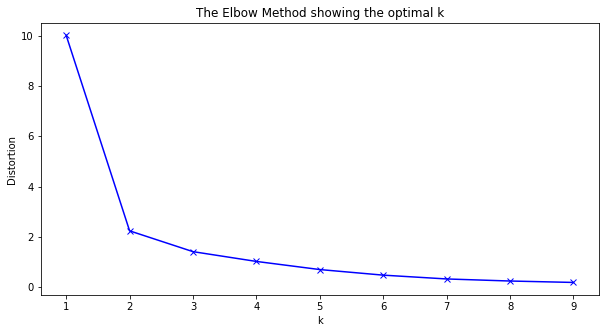

In [22]:
# DataFrame with only statistical data
beo_kmeans_onlystat = beo7[['Real-estate avg price', 'Employees avg income']].copy()

D_onlystat = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(beo_kmeans_onlystat)
    D_onlystat.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K, D_onlystat, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

##### Option: Use only venue category data
- Running K-Means with a range of k
- Plotting the distortions of K-Means

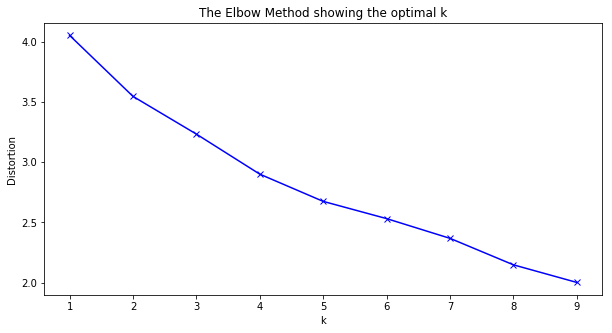

In [23]:
# DataFrame with only venue category data
beo_kmeans_onlyvenue = beo7.drop(['Municipality', 'Neighborhood', 'Real-estate avg price', 'Employees avg income'], 1)

D_onlyvenue = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(beo_kmeans_onlyvenue)
    D_onlyvenue.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K, D_onlyvenue, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

##### Option: Use both statistical and veue category data
- Running K-Means with a range of k
- Plotting the distortions of K-Means

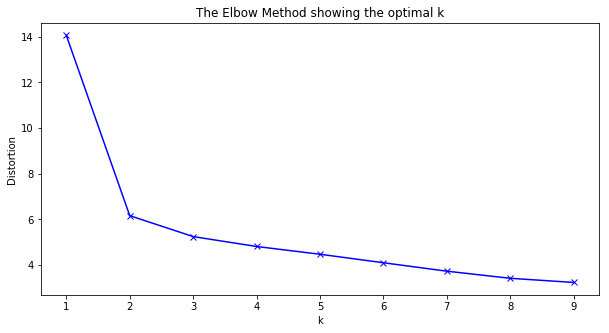

In [24]:
# DataFrame with both statitical and venue category data
beo_kmeans = beo7.drop(['Municipality', 'Neighborhood'], 1)

D = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(beo_kmeans)
    D.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K, D, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Clustering on only venue category data will obviously not provide satisfactorary results.

We will use k on both statistical and venue category data.

In [25]:
# set number of clusters
k = 3

# run k-means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(beo_kmeans)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

## 4.2. Exploring

Function to sort the venue categories, by most common categries.

In [26]:
def getMostCommonVenues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Let's create a new DataFrame with top 5 venue categories in the neighborhood.

In [27]:
# top 5 venue category, 
top = 5
indicators = ['st', 'nd', 'rd']
columns = ['Neighborhood']

# create columns according to number of top venues
for i in np.arange(top):
    try:
        columns.append('{}{} Most Common Venue'.format(i+1, indicators[i]))
    except:
        columns.append('{}th Most Common Venue'.format(i+1))

# create a new dataframe
beo8 = pd.DataFrame(columns=columns)
beo8['Neighborhood'] = beo6['Neighborhood']

for ind in np.arange(beo6.shape[0]):
    beo8.iloc[ind, 1:] = getMostCommonVenues(beo6.iloc[ind, :], top)

print(beo8.shape)
beo8.head()

(59, 6)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,A blok,Coffee Shop,Restaurant,Bistro,Zoo,Food Court
1,Andrićev venac,Coffee Shop,Restaurant,Hostel,Hotel,Pub and Bar
2,Arena,Restaurant,Coffee Shop,Pub and Bar,Pizza Place,Bakery
3,Belgrade Waterfront,Nightclub,Restaurant,Coffee Shop,Electronics Store,Grocery and Supermarket
4,Belvil,Restaurant,Coffee Shop,Clothing Store,Shoe Store,Cosmetics Shop


Let's create a new DataFrame that includes the cluster label as well as the top 5 venue categories for each neighborhood.

- This DataFrame will be core data source for exploring the clustering model, and for further delivering of the results.

In [28]:
# merge belgrade data (incl. latitude/longitude for each neighborhood) with top 10 venues categories
beo9 = beo2[['Municipality', 'Neighborhood', 'Latitude', 'Longitude', 'Radius', 'Real-estate avg price', 'Employees avg income']].copy()
beo9 = beo9.join(beo8.set_index('Neighborhood'), on='Neighborhood')

# add clusters labels
beo9.insert(2, 'Cluster Labels', kmeans.labels_)

print(beo9.shape)
beo9.head()

(59, 13)


,Municipality,Neighborhood,Cluster Labels,Latitude,Longitude,Radius,Real-estate avg price,Employees avg income,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Novi Beograd,A blok,2,44.806583,20.401885,200,2728,1069.020154,Coffee Shop,Restaurant,Bistro,Zoo,Food Court
1,Novi Beograd,Arena,2,44.814569,20.421348,500,2006,1069.020154,Restaurant,Coffee Shop,Pub and Bar,Pizza Place,Bakery
2,Novi Beograd,Belvil,2,44.805555,20.407605,200,2728,1069.020154,Restaurant,Coffee Shop,Clothing Store,Shoe Store,Cosmetics Shop
3,Novi Beograd,Bežanijski blokovi,2,44.806209,20.382241,500,1480,1069.020154,Coffee Shop,Restaurant,Gym and Recreation,Grocery and Supermarket,Bakery
4,Novi Beograd,Bežaniska kosa,2,44.817644,20.375562,500,1586,1069.020154,Gym and Recreation,Bakery,Pie Shop,Diner,Restaurant


Let's visualize the map with clusters.

In [29]:
# create map
Beograd_Map_Clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(beo9['Latitude'], beo9['Longitude'], beo9['Neighborhood'], beo9['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(Beograd_Map_Clusters)
       
Beograd_Map_Clusters

<a id="item5"> </a>
# 5. Results - Response to the Business Problem
##### In which neighborhoods to start new business? 

In order to evaluate whihc neighborhoods has potential for additional venues, let's first create a new DataFrame for count venues per category for each neighborhood.

In [30]:
beo10 = beo5_onehot.groupby('Neighborhood').sum().reset_index()
print(beo10.shape)
beo10.head()

(59, 163)


,Neighborhood,Arcade,Art Gallery,Arts & Crafts Store,Athletics & Sports,Auto Garage,Auto Workshop,BBQ and Burger,Baby Store,Bakery,Bank,Basketball Stadium,Bed & Breakfast,Beer Store,Betting Shop,Bistro,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Buffet,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Camera Store,Candy Store,Carpet Store,Casino,Chocolate Shop,Church,Clothing Store,Coffee Shop,College Quad,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cultural Center,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Dog Run,Donut Shop,Drugstore,Electronics Store,Erotic Museum,Event Space,Eye Doctor,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Forest,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Gas Station,General Entertainment,Gift Shop,Gourmet Shop,Grocery and Supermarket,Gun Range,Gym and Recreation,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hostel,Hotel,IT Services,Ice Cream Shop,Indoor Play Area,Insurance Office,Jazz Club,Jewelry Store,Kids Store,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Men's Store,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater and Multiplex,Moving Target,Museum,Music Store,Nail Salon,Neighborhood Site,Nightclub,Noodle House,Organic Grocery,Other Nightlife,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pedestrian Plaza,Perfume Shop,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pizza Place,Playground,Plaza,Pool,Pool Hall,Print Shop,Pub and Bar,Record Shop,Rest Area,Restaurant,Road,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sausage Shop,Sculpture Garden,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Spa,Sporting Goods Shop,Steakhouse,Tea Room,Tennis Court,Theater,Theme Park,Thrift / Vintage Store,Track,Trail,Tram Station,Video Store,Water Park,Women's Store,Zoo
0,A blok,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Andrićev venac,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,10,0,0,0,0,0,2,1,1,1,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,1,1,0,1,0,0,6,6,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,2,0,0,0,5,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,Arena,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,4,0,0,14,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Belgrade Waterfront,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Belvil,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,0,0,0,1,0,0,0,0,3,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's merge summary data with cluster data. 

- This DataFrame will be core data source for delivering the reults.

In [31]:
# merge belgrade data (incl. latitude/longitude for each neighborhood) with top 10 venues categories
beo11 = beo9.copy()
beo11 = beo11.join(beo10.set_index('Neighborhood'), on='Neighborhood')

print(beo11.shape)
beo11.head()

(59, 175)


,Municipality,Neighborhood,Cluster Labels,Latitude,Longitude,Radius,Real-estate avg price,Employees avg income,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Arcade,Art Gallery,Arts & Crafts Store,Athletics & Sports,Auto Garage,Auto Workshop,BBQ and Burger,Baby Store,Bakery,Bank,Basketball Stadium,Bed & Breakfast,Beer Store,Betting Shop,Bistro,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Buffet,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Camera Store,Candy Store,Carpet Store,Casino,Chocolate Shop,Church,Clothing Store,Coffee Shop,College Quad,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cultural Center,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Dog Run,Donut Shop,Drugstore,Electronics Store,Erotic Museum,Event Space,Eye Doctor,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Forest,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Gas Station,General Entertainment,Gift Shop,Gourmet Shop,Grocery and Supermarket,Gun Range,Gym and Recreation,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hostel,Hotel,IT Services,Ice Cream Shop,Indoor Play Area,Insurance Office,Jazz Club,Jewelry Store,Kids Store,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Men's Store,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater and Multiplex,Moving Target,Museum,Music Store,Nail Salon,Neighborhood Site,Nightclub,Noodle House,Organic Grocery,Other Nightlife,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pedestrian Plaza,Perfume Shop,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pizza Place,Playground,Plaza,Pool,Pool Hall,Print Shop,Pub and Bar,Record Shop,Rest Area,Restaurant,Road,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sausage Shop,Sculpture Garden,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Spa,Sporting Goods Shop,Steakhouse,Tea Room,Tennis Court,Theater,Theme Park,Thrift / Vintage Store,Track,Trail,Tram Station,Video Store,Water Park,Women's Store,Zoo
0,Novi Beograd,A blok,2,44.806583,20.401885,200,2728,1069.020154,Coffee Shop,Restaurant,Bistro,Zoo,Food Court,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Novi Beograd,Arena,2,44.814569,20.421348,500,2006,1069.020154,Restaurant,Coffee Shop,Pub and Bar,Pizza Place,Bakery,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,4,0,0,14,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Novi Beograd,Belvil,2,44.805555,20.407605,200,2728,1069.020154,Restaurant,Coffee Shop,Clothing Store,Shoe Store,Cosmetics Shop,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,0,0,0,1,0,0,0,0,3,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Novi Beograd,Bežanijski blokovi,2,44.806209,20.382241,500,1480,1069.020154,Coffee Shop,Restaurant,Gym and Recreation,Grocery and Supermarket,Bakery,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Let's select venue categories which are of interest for the analysis

I will select several venue categories whose business is relevant to the neighborhood residents. Venue categories might be exclued, or others can be included where applicable, but in this analysys those will not be covered.
- Gym and Recreation - incl. also Fitness, Yoga, Pilates studios facilities etc.,
- Indoor Play Area - inl. Indor Kids Playgrounds,
- Pub and Bar - incl. all specific types of Pubs and Bars,
- Grocery and Supermarket,
- etc.

In [32]:
# selelct venue categories which are of interest for the analysis
v = [beo11.columns.get_loc('Gym and Recreation'),
     beo11.columns.get_loc('Indoor Play Area'),
     beo11.columns.get_loc('Pub and Bar'), 
     beo11.columns.get_loc('Grocery and Supermarket'),
     beo11.columns.get_loc('Coffee Shop')]

# resulting DataFrame will also have columns with general data about neighborhood
v = list(range(0,2)) + list(range(3,6)) + v

# k is number of clusters 
#k=3

Analysis is perfomed on the statistically normalized venue categories counts:

- Different neighborhoods have differnt size (='Radius'), calucate radius factor as multiplier contained in max radius
- Take average (mean) value of the venue cateory per each cluster, cacluate average (mean) venue factor as multiplier value of appearences of veues 

In [33]:
# create a new DataFrame for the anlysis 
beo12 = pd.DataFrame()

for k_label in range(k):
    # create new DataFrame recomendation (based on statistical method) 
    b = beo11.loc[beo11['Cluster Labels'] == k_label, beo11.columns[v]]

    # different neighborhoods have differnt size (='Radius'), calucate radius factor as multiplier contained in max radius
    r = np.array(b['Radius'].max()/b['Radius'])

    # apply radus factor to counted venues
    b.iloc[:, 5:b.shape[1]+1]=b.iloc[:, 5:b.shape[1]+1].multiply(r, axis=0)

    # cacluate average (mean) venue factor as multiplier value of appearences of veues 
    m = 1 / np.array(b.iloc[:, 5:b.shape[1]+1].mean(axis=0))

    # apply venue factor to counted venues
    b.iloc[:, 5:b.shape[1]+1]=b.iloc[:, 5:b.shape[1]+1].multiply(m, axis=1)
    beo12=beo12.append(b)

# sert by Municipality and Neighborhood
beo12.dropna(inplace=True)
beo12.sort_values(by=['Municipality', 'Neighborhood'], inplace=True)
beo12.reset_index(drop=True, inplace=True)
beo12.drop('Radius', axis=1, inplace=True)
print(beo12.shape)
beo12.head(10)

(59, 9)


,Municipality,Neighborhood,Latitude,Longitude,Gym and Recreation,Indoor Play Area,Pub and Bar,Grocery and Supermarket,Coffee Shop
0,Novi Beograd,A blok,44.806583,20.401885,0.000000,0.000000,0.000000,0.000000,1.405405
1,Novi Beograd,Arena,44.814569,20.421348,1.268293,0.000000,1.112299,0.000000,1.545946
2,Novi Beograd,Belvil,44.805555,20.407605,0.000000,0.000000,0.000000,3.661972,1.405405
3,Novi Beograd,Bežanijski blokovi,44.806209,20.382241,1.902439,0.000000,0.000000,1.464789,0.843243
4,Novi Beograd,Bežaniska kosa,44.817644,20.375562,1.268293,0.000000,0.000000,0.000000,0.000000
5,Novi Beograd,Fontana,44.821129,20.410368,1.268293,3.714286,0.556150,1.464789,0.983784
6,Novi Beograd,Ledine,44.803522,20.343482,0.000000,0.000000,0.000000,0.366197,0.000000
7,Novi Beograd,Naselje Dr Ivan Ribar,44.797573,20.370549,0.634146,0.000000,0.278075,0.000000,0.421622
8,Novi Beograd,Paviljoni,44.833717,20.406040,1.268293,0.000000,0.556150,2.929577,0.702703
9,Novi Beograd,Sava centar,44.809021,20.432033,0.000000,3.714286,0.556150,0.732394,0.702703


## 5.1. Where to open a new venue?
So, what are the most prominent locations (i.e. neighborhoods) where one can start new or extend existing business in Belgrade?
- All locations (i.e. (i.e. neighborhoods) which have below average number of venues (< 1) is potentially good location.
- In this analysis, I will set select locations which are well below average number of venues (< 0.7)
- In this analysis, I will investigate potential opportunities for 'Gym and Recreation' venues.

*) All above selection is subject to changes, deepening of the actual scope of the analysis.

In [34]:
# selelct venue to investigate
y = 'Gym and Recreation'
f = 0.7

# final rcmd DataFrame 
beo13_rcmd = beo12[['Municipality', 'Neighborhood', 'Latitude', 'Longitude', y]]

beo13_rcmd = beo13_rcmd.loc[(beo13_rcmd[y] < f), :]
beo13_rcmd.dropna(inplace=True)
beo13_rcmd.sort_values(by=[y, 'Municipality', 'Neighborhood'], inplace=True)
beo13_rcmd.reset_index(drop=True, inplace=True)
beo13_rcmd

,Municipality,Neighborhood,Latitude,Longitude,Gym and Recreation
0,Novi Beograd,A blok,44.806583,20.401885,0.000000
1,Novi Beograd,Belvil,44.805555,20.407605,0.000000
2,Novi Beograd,Ledine,44.803522,20.343482,0.000000
3,Novi Beograd,Sava centar,44.809021,20.432033,0.000000
4,Novi Beograd,Stara Bežanija,44.807301,20.371678,0.000000
5,Novi Beograd,West 65 Belgrade,44.812632,20.401026,0.000000
6,Novi Beograd,YUBC,44.822919,20.420086,0.000000
7,Savski venac,Belgrade Waterfront,44.804835,20.448303,0.000000
8,Savski venac,Dedinje,44.774353,20.455856,0.000000
9,Savski venac,Palata pravde,44.805280,20.454536,0.000000


Map of Belgrade with recommended locations.

In [35]:
# create map
Beograd_Map_Recommendaton = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, municipl, neigh in zip(beo13_rcmd['Latitude'], beo13_rcmd['Longitude'], beo13_rcmd['Municipality'], beo13_rcmd['Neighborhood']):
    label = '{}, {}'.format(neigh, municipl)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Beograd_Map_Recommendaton)  
    
Beograd_Map_Recommendaton

<a id="item6"> </a>
# 6. Discussion

Clustering results are not surprising for Belgrade. Neighborhood cluster label is in correlation with its distance from the city downtown - which can be empirically confirmed as a correct result for Belgrade - but these results were achieved using Data Science methods, using selected data sources, and K-Mean clustering algorithm, so one does not have to have prior knowledge of the city in order to execute this type of analysis.
- It is clear that statistical data are the most impacting factor on cluster label.
- The aim of the clustering is not to determine which neighborhoods are more or less desirable, this could have been done by simple reviewing of the market prices of the real-estates. 
- The aim is to create clusters of similar neighborhoods, which can be used to answer the key Business Problem: In which neighborhoods one can start new business i.e. open new venue.

Why clustering is important?
- If one would compare neighborhoods which belongs to different clusters, resident composition and real-estate pricing (also needed for renting/acquiring business space) would not be mutually comparable.
- By comparing neighborhoods in the same cluster, it is possible to produce more accurate recommendation, in which neighborhoods residents have below average access to the specific venues.

Recommendation is based on the statistical model for each cluster (developed by K-Mean clustering algorithm).
- Different neighborhood size (='Radius') are taken into consideration.
- Average (mean) value of the venue category per each cluster are considered.

##### Limitations
In this show-case Data Science analysis project, I have used freely available data sources. However, certain limitations do apply:
- Statistical data is not available in the easy machine readable format.
- Real-estate data are subject to changes, and info may vary from portal to portal.
- Foursquare provides free API, but does not have full and comprehensive list of venues in Belgrade, compared to Google.

<a id="item7"> </a>
# 7. Conclusion

For the selected venue category, there over 30 differnt locations (i.e. neighborhoods) which can be considered to start new business. This answers the key Business Problem adressed in this Data Science show-case project.

Using the same model, analysis for other venue categories or for other types of business can be conducted as well.

<a id="item8"> </a>
# 8. References

1. Serbia State Statistical Office - https://www.stat.gov.rs/sr-Latn/oblasti/trziste-rada/zarade
2. Beograd.rs - http://www.beograd.rs/
2. Imovina.net - https://imovina.net/statistiika_cena_nekretnina/?viewType=table
3. Foursquare - https://foursquare.com/explore?mode=url&ne=44.862926%2C20.591297&q=Belgrade&sw=44.712586%2C20.303249
4. Google - https://www.google.rs/maps/place/Belgrade/@44.8151597,20.282513,11z/
5. Wikipedia - https://sh.wikipedia.org/wiki/Beograd